# Support Vector Machines (SVM) in Machine Learning

## Introduction

Support Vector Machines (SVM) are powerful and versatile machine learning models that can be used for classification, regression, and outlier detection. SVMs are particularly well suited for complex datasets with small to medium sample sizes.

In this notebook, we will cover:
- Linear SVM classification
- Soft margin classification
- Nonlinear SVM classification
- Polynomial and Gaussian RBF kernels
- Computational complexity of SVMs
- SVM regression

---

### 1. Linear SVM Classification

#### Large Margin Classification

- SVMs attempt to find the **widest possible margin** between different classes.
- The decision boundary is influenced by only a few key data points, called **support vectors**.
- These support vectors define the SVM model, and adding more points that do not change the margin does not affect the decision boundary.

#### Example: Training a Linear SVM Classifier

```python
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

# Create a pipeline for feature scaling and training a Linear SVM classifier
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

# Train the model
svm_clf.fit(X, y)
```

#### Making Predictions
```python
# Predicting whether a flower is Iris-Virginica
svm_clf.predict([[5.5, 1.7]])
```

---


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

# Create a pipeline for feature scaling and training a Linear SVM classifier
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

# Train the model
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
# Predicting whether a flower is Iris-Virginica
svm_clf.predict([[5.5, 1.7]])

array([1.])


### 2. Soft Margin Classification

#### Hard vs. Soft Margin

- **Hard margin classification**: Requires all training instances to be correctly classified with no errors. However, this does not work well if the data is not perfectly separable.
- **Soft margin classification**: Allows some misclassification to create a more generalizable model.
- The `C` hyperparameter controls the trade-off between large margins and fewer margin violations. A **smaller C** value increases the margin but allows more violations.

#### Example: Controlling Margin Violations
```python
svm_clf_soft = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=0.1, loss="hinge"))
])
svm_clf_soft.fit(X, y)
```

---


In [3]:
svm_clf_soft = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=0.1, loss="hinge"))
])
svm_clf_soft.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=0.1, loss='hinge'))])

In [4]:
svm_clf_soft = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=0.5, loss="hinge"))
])
svm_clf_soft.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=0.5, loss='hinge'))])


### 3. Nonlinear SVM Classification

#### Handling Nonlinear Data
- Some datasets are not **linearly separable**.
- Adding **polynomial features** or using **kernel tricks** can help.

#### Example: Using Polynomial Features
```python
from sklearn.preprocessing import PolynomialFeatures

# Create a pipeline for Polynomial SVM Classification
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)
```



In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Create a pipeline for Polynomial SVM Classification
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

---

### 4. Using Kernel Tricks

#### Polynomial Kernel
- Instead of manually adding polynomial features, we can use a **Polynomial Kernel**.

```python
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)
```



In [6]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

#### Gaussian RBF Kernel
- A more flexible approach is to use a **Radial Basis Function (RBF) Kernel**, which captures complex decision boundaries.

```python
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)
```

---



In [7]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

### 5. Computational Complexity of SVMs

| SVM Model | Time Complexity | Kernel Trick | Recommended For |
|-----------|----------------|--------------|----------------|
| **LinearSVC** | O(m × n) | ❌ No | Large datasets |
| **SGDClassifier** | O(m × n) | ❌ No | Online learning |
| **SVC** | O(m² × n) to O(m³ × n) | ✅ Yes | Small/medium datasets |

- **LinearSVC** is faster for large datasets but does not support kernel tricks.
- **SVC** supports kernel methods but is slower on large datasets.

---

### 6. SVM Regression

#### How It Works
- Instead of maximizing margin between two classes, **SVM Regression** tries to fit as many instances within a margin (controlled by `epsilon`).
- Instances outside this margin contribute to the error.

#### Example: Linear SVM Regression
```python
from sklearn.svm import LinearSVR

# Train a Linear SVM Regression model
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)
```

#### Example: Nonlinear SVM Regression
```python
from sklearn.svm import SVR

# Train a Nonlinear SVM Regression model using polynomial kernel
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)
```


#### Load Dataset and Train Model
```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

warnings.filterwarnings('ignore')

# Load dataset
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values  # Selects the feature (job level)
y = dataset.iloc[:, 2].values  # Selects the target (salary)

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

# Train Support Vector Regression Model
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())
```

#### Predict Salary for a New Job Level
```python
# Predict salary for a job level of 6.5
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
y_pred
```

#### Visualizing the SVM Regression Model
```python
# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="red", label="Actual Salaries")
plt.plot(X, regressor.predict(X), color="blue", label="Predicted Salaries")
plt.title("SVM Regression on Salary Dataset")
plt.xlabel("Job Level")
plt.ylabel("Salary")
plt.legend()
plt.show()
```

### Practice the above code here:

In [8]:
# copy-paste the above code and read it line by line:

In [9]:
# Linear SVM Regression
from sklearn.svm import LinearSVR

# Train a Linear SVM Regression model
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [10]:
# Nonlinear SVM Regression
from sklearn.svm import SVR

# Train a Nonlinear SVM Regression model using polynomial kernel
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

dataset: https://www.kaggle.com/datasets/mariospirito/position-salariescsv

In [12]:
# load datset  & train model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

warnings.filterwarnings('ignore')

# Load dataset
dataset = pd.read_csv("C:/Users/scgoo/OneDrive/Documents/colleges/Jacksonville/Spring 2025/Math 470 - ML Algorithms/githubMath470/data/"+"Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values  # Selects the feature (job level)
y = dataset.iloc[:, 2].values  # Selects the target (salary)

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

# Train Support Vector Regression Model
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR()

In [13]:
# Predict salary for a job level of 6.5
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
y_pred

array([[170370.0204065]])

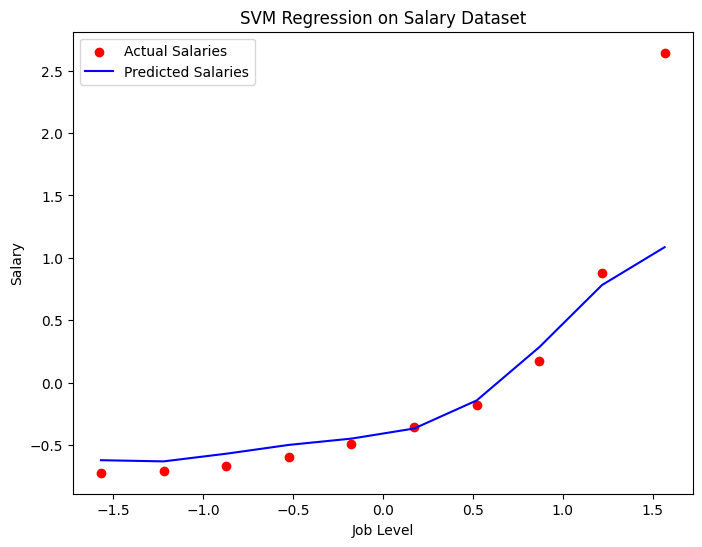

In [14]:
# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="red", label="Actual Salaries")
plt.plot(X, regressor.predict(X), color="blue", label="Predicted Salaries")
plt.title("SVM Regression on Salary Dataset")
plt.xlabel("Job Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

<br><br><br><br><br><br><br><br><br><br><br>

---

#### Load Dataset and Train Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

warnings.filterwarnings('ignore')

# Load dataset
dataset = pd.read_csv("C:/Users/scgoo/OneDrive/Documents/colleges/Jacksonville/Spring 2025/Math 470 - ML Algorithms/githubMath470/data/"+"Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values  # Selects the feature (job level)
y = dataset.iloc[:, 2].values  # Selects the target (salary)

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

# Train Support Vector Regression Model
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

#### Predict Salary for a New Job Level

In [ ]:
# Predict salary for a job level of 6.5
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
y_pred

#### Visualizing the SVM Regression Model

In [ ]:
# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="red", label="Actual Salaries")
plt.plot(X, regressor.predict(X), color="blue", label="Predicted Salaries")
plt.title("SVM Regression on Salary Dataset")
plt.xlabel("Job Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

#### Compute the accuracy

In [ ]:
accuracy = regressor.score(X[:-1,:],y[:-1,:])
print('Accuracy of the model is',accuracy*100,'%')

---

### 7. Summary

* ✅ **SVMs** work well for small/medium datasets.
* ✅ **Linear SVMs** are fast but require feature scaling.
* ✅ **Soft Margin Classification** allows flexibility when data is not perfectly separable.
* ✅ **Kernelized SVMs** extend SVMs to nonlinear classification tasks.
* ✅ **SVM Regression** is useful for predicting continuous values.

